## Research Question 2: What are the insights from leading industries?


In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
import plotly.express as px
import pycountry #needed to convert country code into country name
 

pd.set_option('display.max_columns', 500)

In [3]:
# Loading olympic datafiles into DataFrames

startup_df = pd.read_csv('big_startup_secsees_dataset 2.csv')
startup_df = startup_df.loc[startup_df['funding_total_usd'] != '-',:]

In [4]:
# Creating functions needed later

def convert_date(date_str):
    try:
        date = pd.to_datetime(date_str, format='%Y-%m-%d')
        if 1900 <= date.year <= 2050:
            return date
        else:
            # Handle out-of-range years or invalid dates as needed
            return None  # Or any other action (e.g., logging, replacing with NaN)
    except ValueError:
        return None  # Or handle other parsing issues
    
def time_delta_to_days(td):
    return td.days

def time_delta_to_years(td):
    return td.years


def convert_country_code_to_name(country_code):
    try:
        country = pycountry.countries.get(alpha_3=country_code)
        if country:
            return country.name
        else:
            return "Country not found"
    except LookupError:
        return "Lookup error occurred"

In [5]:
startup_df.shape

(53583, 14)

In [6]:
startup_df.nunique(axis=0)

permalink            53583
name                 53409
homepage_url         50119
category_list        23368
funding_total_usd    18895
status                   4
country_code           134
state_code             302
region                1045
city                  4300
funding_rounds          19
founded_at            3523
first_funding_at      4569
last_funding_at       4237
dtype: int64

In [7]:
startup_df.dtypes

permalink            object
name                 object
homepage_url         object
category_list        object
funding_total_usd    object
status               object
country_code         object
state_code           object
region               object
city                 object
funding_rounds        int64
founded_at           object
first_funding_at     object
last_funding_at      object
dtype: object

In [8]:
startup_df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,1,NaN,2014-07-01,2014-07-01


In [9]:
# Pre-processing

#Change date columns from string to datetime
startup_df['founded_at']= startup_df['founded_at'].map(convert_date)
startup_df['first_funding_at']= startup_df['first_funding_at'].map(convert_date)
startup_df['last_funding_at'] = startup_df['last_funding_at'].map(convert_date)

#Create year columns
startup_df['founded_year'] = pd.DatetimeIndex(startup_df['founded_at']).year
startup_df['first_funding_year'] = pd.DatetimeIndex(startup_df['first_funding_at']).year
startup_df['last_funding_year'] = pd.DatetimeIndex(startup_df['last_funding_at']).year

#Create month columns
startup_df['founded_month'] = pd.DatetimeIndex(startup_df['founded_at']).month
startup_df['first_funding_month'] = pd.DatetimeIndex(startup_df['first_funding_at']).month
startup_df['last_funding_month'] = pd.DatetimeIndex(startup_df['last_funding_at']).month


#Create duration columns being funding rounds and founding (days)
startup_df['days_to_first_funding'] = (startup_df.first_funding_at - startup_df.founded_at).map(time_delta_to_days)
startup_df['days_between_first_and_recent_funding'] = (startup_df.last_funding_at - startup_df.first_funding_at).map(time_delta_to_days)
startup_df['days_between_founding_and_recent_funding'] = (startup_df.last_funding_at - startup_df.founded_at).map(time_delta_to_days)


#Create duration columns being funding rounds and founding (years)
startup_df['year_to_first_funding'] = (startup_df['days_to_first_funding'] / 365).astype(float)
startup_df['year_between_first_and_recent_funding'] = (startup_df['days_between_first_and_recent_funding'] / 365).astype(float)
startup_df['years_between_founding_and_recent_funding'] = (startup_df['days_between_founding_and_recent_funding'] / 365).astype(float)

#Calculate total funding normalized by number of rounds of funding
startup_df['funding_total_usd']= startup_df['funding_total_usd'].astype(float)
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['funding_rounds']

#Creating a total funding normalized by days from first to recent funding
startup_df['total_funding_normalized_by_rounds'] = startup_df['funding_total_usd'] / startup_df['days_between_first_and_recent_funding']

#Creating a country column
startup_df['country_name'] = startup_df['country_code'].map(convert_country_code_to_name)

#Converting category_list to string
startup_df['category_list']= startup_df['category_list'].astype(str)


#Capitalizing status names
startup_df['status'] = startup_df['status'].str.capitalize().str.replace('Ipo', 'IPO')


startup_df.head(5)

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,first_funding_year,last_funding_year,founded_month,first_funding_month,last_funding_month,days_to_first_funding,days_between_first_and_recent_funding,days_between_founding_and_recent_funding,year_to_first_funding,year_between_first_and_recent_funding,years_between_founding_and_recent_funding,total_funding_normalized_by_rounds,country_name
0,/organization/-fame,#fame,http://livfame.com,Media,10000000.0,Operating,IND,16,Mumbai,Mumbai,1,NaT,2015-01-05,2015-01-05,NaN,2015.0,2015.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,India
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000.0,Operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014.0,9.0,3.0,10.0,-187.0,227.0,40.0,-0.512329,0.621918,0.109589,3083.700441,United States
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878.0,Operating,NaN,NaN,NaN,NaN,1,NaT,2014-01-30,2014-01-30,NaN,2014.0,2014.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,Lookup error occurred
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000.0,Operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19,2007.0,2008.0,2008.0,1.0,3.0,3.0,443.0,0.0,443.0,1.213699,0.000000,1.213699,inf,China
5,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250.0,Operating,HKG,NaN,Hong Kong,Hong Kong,1,NaT,2014-07-01,2014-07-01,NaN,2014.0,2014.0,NaN,7.0,7.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,Hong Kong


In [10]:
startup_df.shape #doubled the number of columns via feature engineering

(53583, 28)

In [11]:
# Creating a new dataframe that splits each industry per cell in category list into an individual row.

startup_df_categories = startup_df.copy()
startup_df_categories['category_list'] = startup_df_categories['category_list'].apply(lambda x: x.split('|'))

# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in startup_df_categories['category_list']:
    list_.extend(map(lambda x: [index, x], item))
    index += 1
category_list = pd.DataFrame(list_, columns = ['index', 'category_list'])
category_list.head(15) 
#df_genre.genres

startup_df_categories = pd.merge(startup_df_categories.drop('category_list', axis = 1), category_list, how = 'right', left_index = True, right_on = 'index')
print(startup_df_categories.shape)
startup_df_categories.head()



(129282, 29)


,permalink,name,homepage_url,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,founded_year,first_funding_year,last_funding_year,founded_month,first_funding_month,last_funding_month,days_to_first_funding,days_between_first_and_recent_funding,days_between_founding_and_recent_funding,year_to_first_funding,year_between_first_and_recent_funding,years_between_founding_and_recent_funding,total_funding_normalized_by_rounds,country_name,index,category_list
0,/organization/-fame,#fame,http://livfame.com,10000000.0,Operating,IND,16,Mumbai,Mumbai,1.0,NaT,2015-01-05,2015-01-05,NaN,2015.0,2015.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,India,0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,700000.0,Operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014.0,9.0,3.0,10.0,-187.0,227.0,40.0,-0.512329,0.621918,0.109589,3083.700441,United States,1,Application Platforms
2,/organization/-qounter,:Qounter,http://www.qounter.com,700000.0,Operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014.0,9.0,3.0,10.0,-187.0,227.0,40.0,-0.512329,0.621918,0.109589,3083.700441,United States,1,Real Time
3,/organization/-qounter,:Qounter,http://www.qounter.com,700000.0,Operating,USA,DE,DE - Other,Delaware City,2.0,2014-09-04,2014-03-01,2014-10-14,2014.0,2014.0,2014.0,9.0,3.0,10.0,-187.0,227.0,40.0,-0.512329,0.621918,0.109589,3083.700441,United States,1,Social Network Media
4,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,3406878.0,Operating,NaN,NaN,NaN,NaN,1.0,NaT,2014-01-30,2014-01-30,NaN,2014.0,2014.0,NaN,1.0,1.0,NaN,0.0,NaN,NaN,0.000000,NaN,inf,Lookup error occurred,2,Apps


Text(0.5, 1.0, 'Industries with Highest Number of Companies')

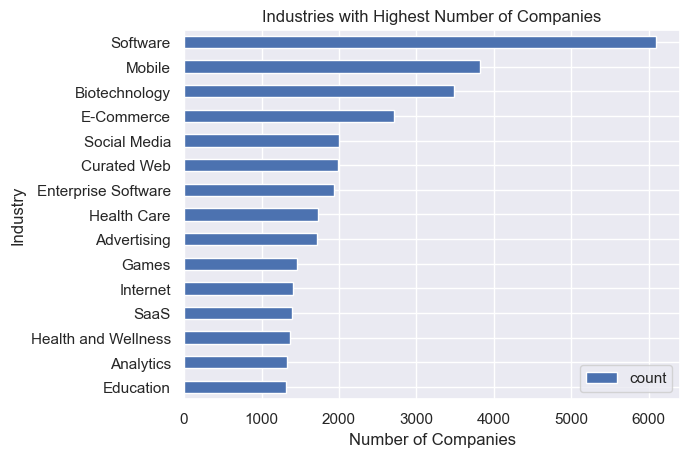

In [20]:
#Industries with Greatest Number of Companies

sns.set_theme(style="darkgrid")

startup_df_categories.groupby('category_list')[['permalink']].count().rename(columns= {'permalink': 'count'}).sort_values(by = 'count',ascending=True).reset_index().tail(15).plot.barh('category_list','count',color = 'b')


plt.xlabel("Number of Companies")
plt.ylabel("Industry")
plt.title("Industries with Highest Number of Companies") 



Text(0.5, 1.0, 'Average First Funding Amount over Time')

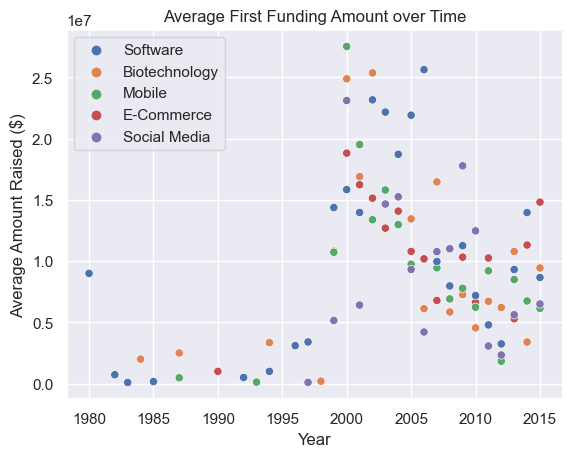

In [50]:
#Average first rounds of funding over years, without outliers

sns.set_theme(style="darkgrid")

top_5_startup_df_agg = startup_df_categories.loc[(startup_df_categories['funding_rounds'] == 1) & (startup_df_categories['category_list'].isin(['Software','Biotechnology','Mobile','E-Commerce','Social Media'])), :].groupby(['first_funding_year','category_list'])['funding_total_usd'].agg(['mean','max','sum'])

top_5_startup_df_agg.loc[top_5_startup_df_agg['mean'] < 30000000,:].pipe((sns.scatterplot, 'data'), x='first_funding_year', y='mean', hue = 'category_list')
plt.legend(loc='upper left')


plt.xlabel("Year")
plt.ylabel("Average Amount Raised ($)")
plt.title("Average First Funding Amount over Time") 




Text(0.5, 1.0, 'Total First Funding Amount over Time')

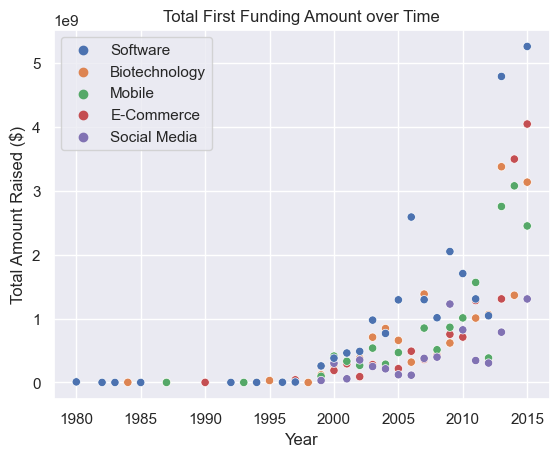

In [52]:
# Total First Funding Amount over Time

top_5_startup_df_agg.loc[top_5_startup_df_agg['sum'] < 8000000000,:].pipe((sns.scatterplot, 'data'), x='first_funding_year', y='sum', hue = 'category_list')
plt.legend(loc='upper left')


plt.xlabel("Year")
plt.ylabel("Total Amount Raised ($)")
plt.title("Total First Funding Amount over Time") 


Text(0.5, 1.0, 'Number of Founded Startups over Time')

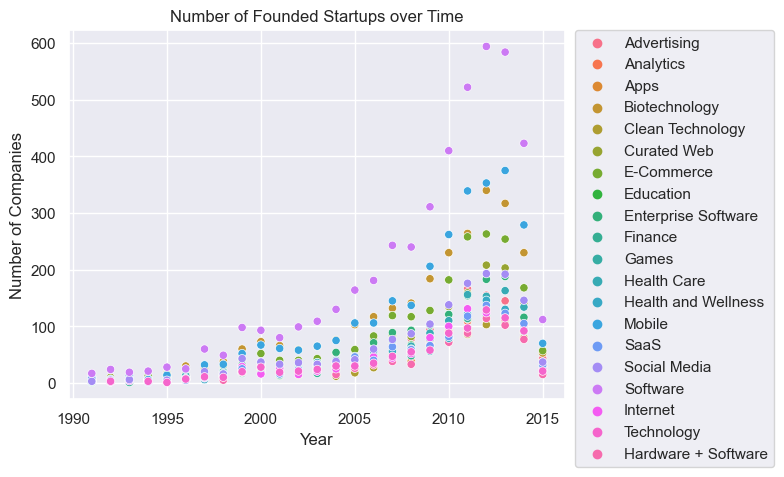

In [24]:
sns.set_theme(style="darkgrid")

startup_df_categories_counts = pd.merge(startup_df_categories,\
                                     startup_df_categories.groupby('category_list')[['permalink']].count().rename(columns = {'permalink': 'count'}),\
                                     on = 'category_list')
#Dataframe with counts for top 20 industries with greatest number of companies
top_20_startup_df_categories_counts= startup_df_categories_counts.loc[startup_df_categories_counts['count'] >= 1100, :]

#Dataframe with counts for top 5 industries with greatest number of companies
top_5_startup_df_categories_counts= startup_df_categories_counts.loc[startup_df_categories_counts['count'] >= 1994, :]

#Number of Founded Startups for Top 20 Industries over Time
top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count', hue = 'category_list')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of Founded Startups over Time") 


Text(0.5, 1.0, 'Number of Founded Startups over Time')

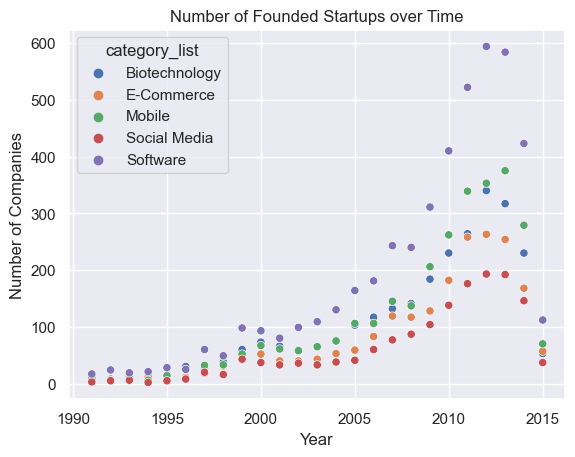

In [26]:
#Number of Founded Startups for Top 5 Industries over Time
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['founded_year'] < 2024) & (top_20_startup_df_categories_counts['founded_year'] > 1990) , :].groupby(['founded_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='founded_year', y='count', hue = 'category_list')

plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of Founded Startups over Time") 


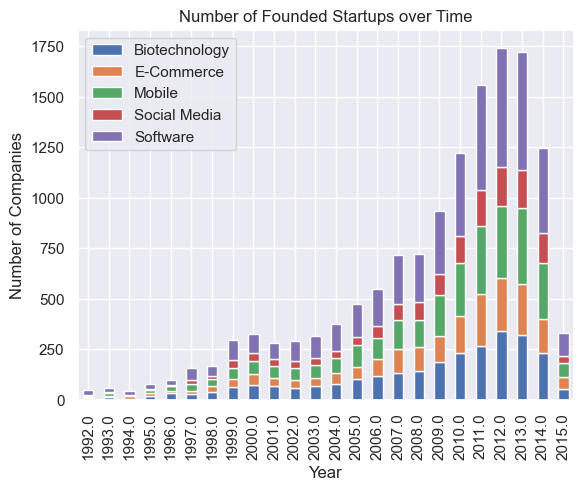

In [34]:
#Number of Founded Startups for Top 5 Industries over Time (same plot as above, but as stacked bar plot)

top_5_startup_df_categories_counts_pivot = top_5_startup_df_categories_counts.groupby(['founded_year','category_list'])['permalink'].agg(['count']).reset_index()\
.pivot(index = 'founded_year',columns = 'category_list',values = 'count').reset_index()
top_5_startup_df_categories_counts_pivot.loc[(top_5_startup_df_categories_counts_pivot['founded_year'] < 2024) & (top_5_startup_df_categories_counts_pivot['founded_year'] > 1991) , :]\
.rename(columns = {'category_list': 'Industry'})\
.plot(kind = 'bar', x = 'founded_year', stacked = True)

plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of Founded Startups over Time") 
plt.legend()

Text(0.5, 1.0, 'Number of First-Funded Startups over Time')

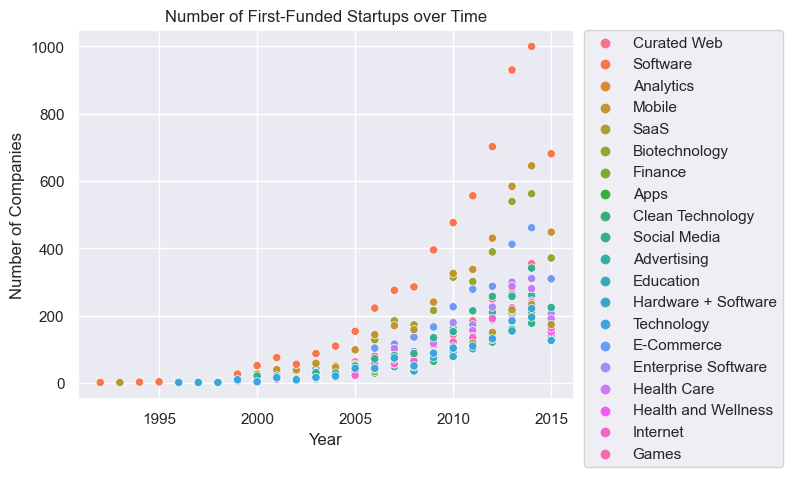

In [30]:
# Number of First-Funded Startups for Top 20 Industries over Time
sns.set_theme(style="darkgrid")
top_20_startup_df_categories_counts.loc[(top_20_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='count', hue = 'category_list')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of First-Funded Startups over Time") 


Text(0.5, 1.0, 'Number of First-Funded Startups over Time')

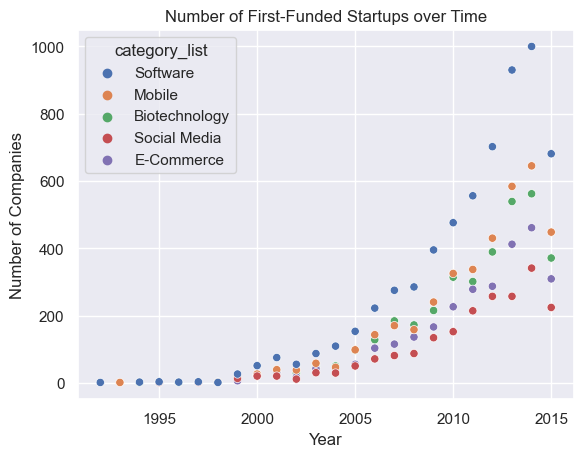

In [35]:
# Number of First-Funded Startups for Top 5 Industries over Time
sns.set_theme(style="darkgrid")
top_5_startup_df_categories_counts.loc[(top_5_startup_df_categories_counts['first_funding_year'] < 2024) & (top_20_startup_df_categories_counts['first_funding_year'] > 1990) , :].groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).pipe((sns.scatterplot, 'data'), x='first_funding_year', y='count', hue = 'category_list')


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of First-Funded Startups over Time") 


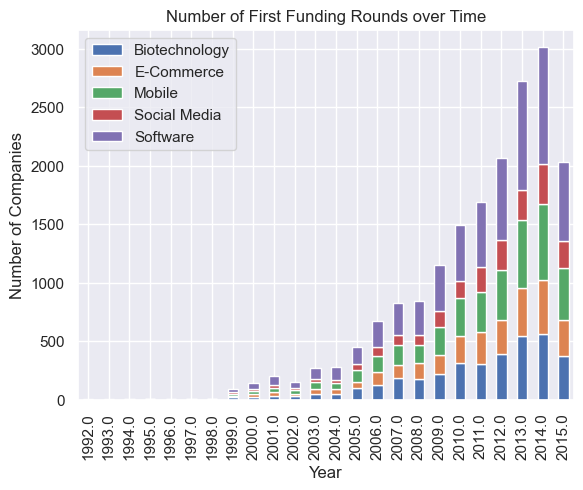

In [36]:
# Number of First-Funded Startups for Top 5 Industries over Time (same plot as above but with stacked bar plots)


top_5_startup_df_categories_counts_pivot = top_5_startup_df_categories_counts.groupby(['first_funding_year','category_list'])['permalink'].agg(['count']).reset_index()\
.pivot(index = 'first_funding_year',columns = 'category_list',values = 'count').reset_index()
top_5_startup_df_categories_counts_pivot.loc[top_5_startup_df_categories_counts_pivot['first_funding_year'] > 1991 , :]\
.plot(kind = 'bar', x = 'first_funding_year', stacked = True)


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of First Funding Rounds over Time") 
plt.legend()

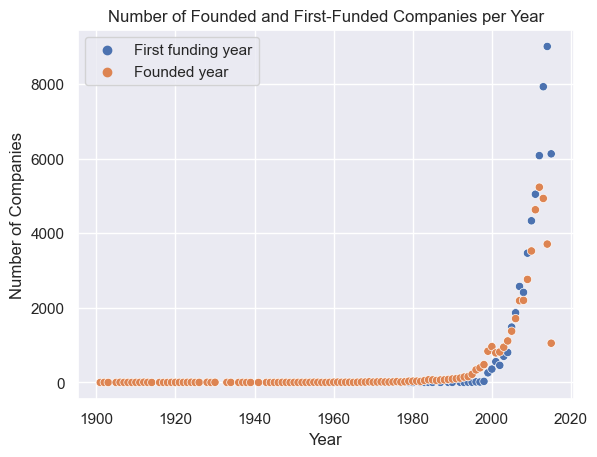

In [45]:
#Number of First-Funded and Founded Companies over Time

startup_df.loc[:,['founded_year','first_funding_year']]

startup_df_first_founded_stack = pd.melt(startup_df.loc[:,['founded_year','first_funding_year']], value_vars=['founded_year', 'first_funding_year']).dropna().sort_values(by = 'value').reset_index().groupby(['variable','value'])[['index']].count().reset_index()
startup_df_first_founded_stack['variable'] = startup_df_first_founded_stack['variable'].str.replace('_'," ").str.capitalize()
startup_df_first_founded_stack.loc[startup_df_first_founded_stack['value'] < 2023,:].pipe((sns.scatterplot, 'data'), x='value', y='index', hue = 'variable')


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.title("Number of Founded and First-Funded Companies per Year") 
plt.legend()

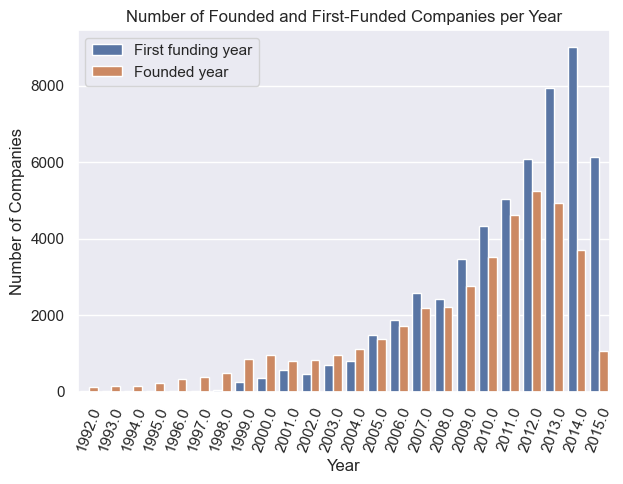

In [53]:
#Number of First-Funded and Founded Companies over Time, same as above but as stacked bar plot

sns.barplot(data = startup_df_first_founded_stack.loc[(startup_df_first_founded_stack['value'] < 2024) & (startup_df_first_founded_stack['value'] > 1991), :],\
            x = 'value', y = 'index', hue = 'variable')
plt.xticks(rotation=70)
plt.tight_layout()

plt.xlabel("Year")
plt.ylabel("Number of Companies")

plt.title('Number of Founded and First-Funded Companies per Year') 
plt.legend(loc='upper left')

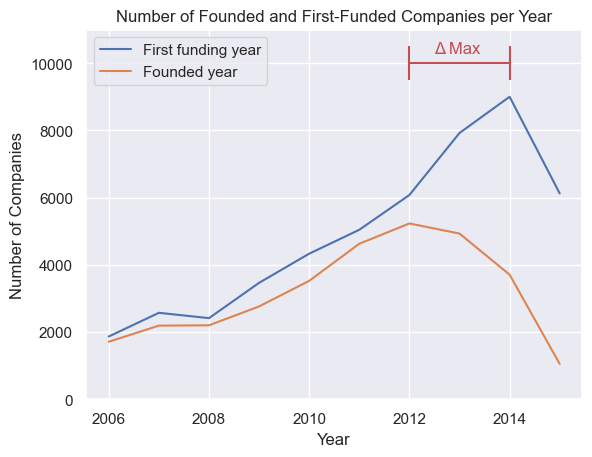

In [44]:
#Number of First-Funded and Founded Companies over Time, but zooming in on 2006-2015 where there was a drop in the number of startup companies

fig = startup_df_first_founded_stack.loc[(startup_df_first_founded_stack['value'] < 2024) & (startup_df_first_founded_stack['value'] > 2005), :]\
.pipe((sns.lineplot, 'data'), x='value', y='index', hue = 'variable')
fig.vlines(x = 2012, ymin = 9500, ymax = 10500, color = 'r', linestyle='solid')
fig.vlines(x = 2014, ymin = 9500, ymax = 10500, color = 'r', linestyle='solid')
fig.hlines(y=10000, xmin=2012, xmax=2014, color='r', linestyle='solid')


plt.xlabel("Year")
plt.ylabel("Number of Companies")
plt.ylim(0,11000)
plt.text(2012.5,10300,'Δ Max', color = 'r')
plt.title("Number of Founded and First-Funded Companies per Year") 
plt.legend(loc='upper left')



In [47]:
# Summary statistics for duration between founding and first-funding years

startup_df.loc[startup_df['founded_year'] > 1990,['year_to_first_funding']].rename(columns = {'year_to_first_funding': 'Years between Founding vs. First-Funding'}).describe()


,Years between Founding vs. First-Funding
count,40712.000000
mean,2.673013
std,3.660430
min,-26.076712
25%,0.413699
50%,1.413699
75%,3.526027
max,24.909589


Text(0.5, 1.0, 'Years between Founding vs. First-Funding')

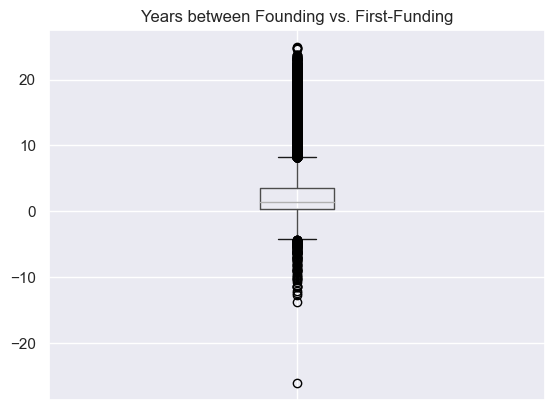

In [48]:
# Years between Founding vs. First-Funding for all Companies

sns.set_theme(style="darkgrid")

startup_df.loc[startup_df['founded_year'] > 1990,['year_to_first_funding']].rename(columns = {'year_to_first_funding': ''}).boxplot()

plt.title('Years between Founding vs. First-Funding') 